In [15]:
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras import layers, models
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential, Model
from keras.layers import (Input, Dense, Dropout, Activation, GlobalAveragePooling2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D)

In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
pneumoniamnist_path = r"C:\Users\clara\Documents\uni\4thYear_AMLS\Datasets\pneumoniamnist.npz"
pneumoniamnist= np.load(pneumoniamnist_path)

#lst = pneumoniamnist.files
#for item in lst:
#    print(item)
 #   print(pneumoniamnist[item])
    
type(pneumoniamnist)

numpy.lib.npyio.NpzFile

In [18]:
def load_data_pneumonia():
    path = r"C:\Users\clara\Documents\uni\4thYear_AMLS\Datasets\pneumoniamnist.npz"
    with np.load(path) as pneumoniamnist:
        x_train = pneumoniamnist['train_images']
        y_train = pneumoniamnist['train_labels']
        x_val = pneumoniamnist['val_images']
        y_val = pneumoniamnist['val_labels']
        x_test = pneumoniamnist['test_images']
        y_test = pneumoniamnist['test_labels']

    return ((x_train, y_train), (x_val, y_val), (x_test, y_test))

In [19]:
pneumoniamnist['train_images'].shape, pneumoniamnist['train_labels'].shape #((4708, 28, 28), (4708, 1))
pneumoniamnist['val_images'].shape, pneumoniamnist['val_labels'].shape #((524, 28, 28), (524, 1))
pneumoniamnist['test_images'].shape, pneumoniamnist['test_labels'].shape #((624, 28, 28), (624, 1))
# This indicates that you have 4708 images in the training set, where each image is a 28x28 pixel grayscale image


((624, 28, 28), (624, 1))

In [20]:
pneumoniamnist['val_images'].shape, pneumoniamnist['val_labels'].shape #((524, 28, 28), (524, 1))

((524, 28, 28), (524, 1))

In [21]:
pneumoniamnist['test_images'].shape, pneumoniamnist['test_labels'].shape #((624, 28, 28), (624, 1))

((624, 28, 28), (624, 1))

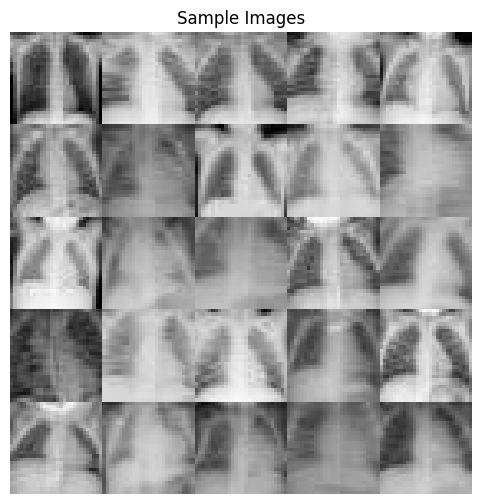

In [22]:
from skimage.util import montage
import matplotlib.pyplot as plt

def visualize_images(images, labels, n_channels, length=20):
    scale = length * length

    # Create an array to store the images
    image = np.zeros((scale, 28, 28, 3)) if n_channels == 3 else np.zeros((scale, 28, 28))
    
    # Create an array of indices for shuffling
    index = [i for i in range(scale)]
    np.random.shuffle(index)
    
    plt.figure(figsize=(6, 6))

    for idx in range(scale):
        img = images[idx]
        if n_channels == 3:
            img = img.reshape(28, 28, n_channels)
        else:
            img = img.reshape(28, 28)
        image[index[idx]] = img

    if n_channels == 1:
        image = image.reshape(scale, 28, 28)
        arr_out = montage(image)
        plt.imshow(arr_out, cmap='gray')
    else:
        image = image.reshape(scale, 28, 28, 3)
        arr_out = montage(image, multichannel=3)
        plt.imshow(arr_out)

    plt.title("Sample Images")
    plt.axis("off")
    plt.show()

# Assuming you have loaded the PneumoniaMNIST dataset
(train_images, train_labels), _, _ = load_data_pneumonia()

# Visualize grayscale images
visualize_images(train_images, train_labels, n_channels=1, length=5)


In [23]:
def pneumoniaLogRegrPredict(x_train, y_train, x_val, y_val, x_test, y_test):
    model = LogisticRegression(solver='lbfgs', max_iter=1000)

    # Flatten the images
    train_images_flatten = np.reshape(x_train, (len(x_train), -1))
    val_images_flatten = np.reshape(x_val, (len(x_val), -1))
    test_images_flatten = np.reshape(x_test, (len(x_test), -1))
    #print(train_images_flatten.shape)
    print(test_images_flatten.shape)
    print(y_test.shape)
    # if ravel() not applied this error shows
    #DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(). y = column_or_1d(y, warn=True)

     # Flatten the labels
    y_train_flatten = y_train.ravel()
    y_val_flatten = y_val.ravel()
    y_test_flatten = y_test.ravel()

    # Standardize features
    scaler = StandardScaler()
    train_images_scaled = scaler.fit_transform(train_images_flatten)
    val_images_scaled = scaler.transform(val_images_flatten)
    test_images_scaled = scaler.transform(test_images_flatten)
    # Train the model on the training data
    model.fit(train_images_scaled, y_train_flatten)

    # Validate the model on the validation data
    val_accuracy = model.score(val_images_scaled, y_val_flatten)
    print(f'Validation Accuracy: {val_accuracy}')

    # Test the model on the test data
    test_images_scaled = scaler.transform(np.reshape(x_test, (len(x_test), -1)))
    test_accuracy = model.score(test_images_scaled, y_test_flatten)
    print(f'Test Accuracy: {test_accuracy}')

    # Make predictions on the test set
    y_pred = model.predict(test_images_scaled)

    # Print the predictions and evaluation metrics
    print("Predictions:", y_pred)
    print("Confusion Matrix:\n", confusion_matrix(y_test_flatten, y_pred))
    print("Accuracy on test set:", accuracy_score(y_test_flatten, y_pred))
    print("Classification Report:\n", classification_report(y_test_flatten, y_pred))
    return 

In [24]:
((x_train, y_train), (x_val, y_val), (x_test, y_test))= load_data_pneumonia()
pneumoniaLogRegrPredict(x_train, y_train, x_val, y_val, x_test, y_test)

(624, 784)
(624, 1)
Validation Accuracy: 0.9465648854961832
Test Accuracy: 0.8317307692307693
Predictions: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1

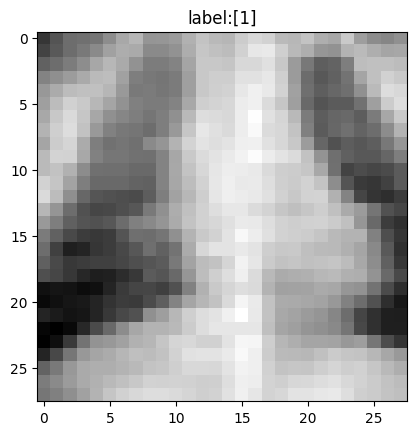

In [25]:
# visualization
import matplotlib.pylab as plt
sample_num = 99
img = x_train[sample_num].reshape(28, 28)
plt.imshow(img, cmap='gray')
template = "label:{label}"
_ = plt.title(template.format(label= str(y_train[sample_num])))
plt.grid(False)
     

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_data_pneumonia():
    path = r"C:\Users\clara\Documents\uni\4thYear_AMLS\Datasets\pathmnist.npz"
    with np.load(path) as pneumoniamnist:
        x_train = pneumoniamnist['train_images']
        y_train = pneumoniamnist['train_labels']
        x_val = pneumoniamnist['val_images']
        y_val = pneumoniamnist['val_labels']
        x_test = pneumoniamnist['test_images']
        y_test = pneumoniamnist['test_labels']

    return ((x_train, y_train), (x_val, y_val), (x_test, y_test))



In [27]:
x_train.shape

(4708, 28, 28)

In [28]:
x_train.shape+(1,)

(4708, 28, 28, 1)

In [29]:
np.expand_dims(x_train, axis=3).shape

(4708, 28, 28, 1)

In [30]:
x_train = np.expand_dims(x_train, axis=3)
print('x_train shape:',x_train.shape)
x_test = np.expand_dims(x_test, axis=3)
print('x_test shape:',x_test.shape)
x_val = np.expand_dims(x_val, axis=3)
print('x_val shape:',x_val.shape)

x_train shape: (4708, 28, 28, 1)
x_test shape: (624, 28, 28, 1)
x_val shape: (524, 28, 28, 1)


In [31]:
num_classes = 2
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_val_onehot = to_categorical(y_val)

print('y_train_onehot shape:', y_train_onehot.shape)
print('y_test_onehot shape:', y_test_onehot.shape)
print('y_val_onehot shape:', y_val_onehot.shape)
     

y_train_onehot shape: (4708, 2)
y_test_onehot shape: (624, 2)
y_val_onehot shape: (524, 2)


In [32]:
input = Input(shape=x_train.shape[1:])

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='last_conv_layer')(x)

x = GlobalAveragePooling2D(name='avg_pool')(x)
output = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=[input], outputs=[output])

In [33]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 last_conv_layer (Conv2D)    (None, 14, 14, 64)        36928     
                                                             

In [34]:
from keras.optimizers import Adam

batch_size = 256
epochs = 20
init_lr = 0.001
opt = Adam(learning_rate=init_lr)

In [35]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics='accuracy')

In [37]:
cnn_history = model.fit(x_train, y_train_onehot,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_val, y_val_onehot),
                  verbose=2)
     

Epoch 1/20
19/19 - 0s - loss: 0.1284 - accuracy: 0.9541 - val_loss: 0.1467 - val_accuracy: 0.9504 - 488ms/epoch - 26ms/step
Epoch 2/20
19/19 - 0s - loss: 0.1168 - accuracy: 0.9569 - val_loss: 0.1277 - val_accuracy: 0.9561 - 252ms/epoch - 13ms/step
Epoch 3/20
19/19 - 0s - loss: 0.1091 - accuracy: 0.9601 - val_loss: 0.1152 - val_accuracy: 0.9599 - 254ms/epoch - 13ms/step
Epoch 4/20
19/19 - 0s - loss: 0.1143 - accuracy: 0.9550 - val_loss: 0.1147 - val_accuracy: 0.9580 - 319ms/epoch - 17ms/step
Epoch 5/20
19/19 - 0s - loss: 0.1127 - accuracy: 0.9569 - val_loss: 0.1361 - val_accuracy: 0.9561 - 265ms/epoch - 14ms/step
Epoch 6/20
19/19 - 0s - loss: 0.1046 - accuracy: 0.9628 - val_loss: 0.1096 - val_accuracy: 0.9599 - 251ms/epoch - 13ms/step
Epoch 7/20
19/19 - 0s - loss: 0.1074 - accuracy: 0.9592 - val_loss: 0.1094 - val_accuracy: 0.9580 - 259ms/epoch - 14ms/step
Epoch 8/20
19/19 - 0s - loss: 0.0952 - accuracy: 0.9654 - val_loss: 0.1223 - val_accuracy: 0.9561 - 313ms/epoch - 16ms/step
Epoch 9/